In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [360]:
train=pd.read_csv('/content/drive/MyDrive/titanic/train.csv')

In [361]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [362]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [363]:
train.isna().mean()*100 # check the non values

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [364]:
id_col=train.PassengerId.str.split('_',expand=True) # split the column id in train data
id_col.columns=['id1','id2']

In [365]:
train=train.join(id_col)

In [366]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,id1,id2
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [367]:
col_cab=train.Cabin.str.split('/',expand=True)# split the cabin
col_cab.columns=['cab1','cab2','cab3'] # 

In [368]:
train=train.join(col_cab) # we add features

In [369]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,id1,id2,cab1,cab2,cab3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S


In [370]:
train.index=train.PassengerId  # drop the columns and use the news features
train.drop(['Name','Cabin','PassengerId','cab2'],axis=1,inplace=True)

In [371]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,id1,id2,cab1,cab3
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,F,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,A,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,A,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,F,S


In [372]:
import seaborn as sns

In [373]:
id_cache=[]               #we replace id1 by the firt number of the id1
for i in range(0,len(train)):
  a=train.id1[i][:1]
  id_cache.append(a)

In [375]:
set(id_cache) # we see that we have only 10 values

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [376]:
len(id_cache),len(train)

(8693, 8693)

In [377]:
train['id']=id_cache 
train.drop('id1',axis=1,inplace=True)

In [378]:
train.id.value_counts()

6    997
4    965
5    954
8    951
3    944
0    937
1    937
2    906
7    836
9    266
Name: id, dtype: int64

In [379]:
train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

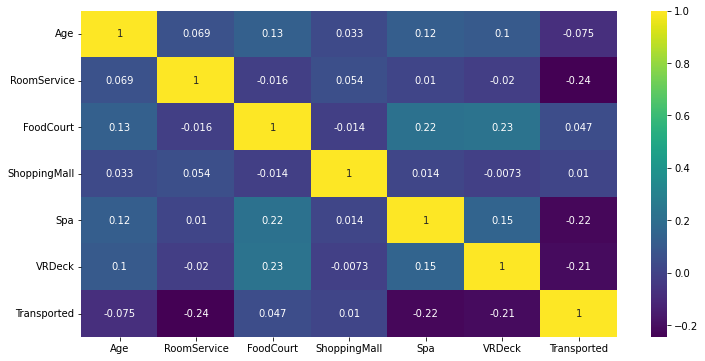

In [380]:
plt.subplots(figsize=(12,6))
sns.heatmap(train.corr(),cmap='viridis',annot=True)

In [381]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  id2           8693 non-null   object 
 12  cab1          8494 non-null   object 
 13  cab3          8494 non-null   object 
 14  id            8693 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 1.0+ MB


In [382]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,id2,cab1,cab3,id
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,01,B,P,0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,01,F,S,0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,01,A,S,0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,02,A,S,0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,01,F,S,0


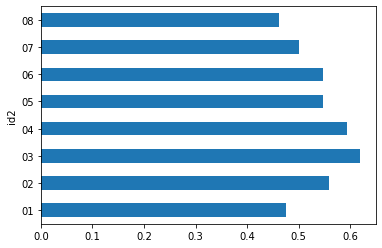

In [385]:
train.groupby('id2').mean()['Transported'].plot(kind='barh')

In [386]:
train.mode()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,id2,cab1,cab3,id
0,Earth,False,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,0.0,True,01,F,S,6


In [387]:
for column in train: # we replace the nan values by mode of column
    if train[column].isnull().any():
      train[column]=train[column].fillna(train[column].mode()[0])

In [388]:
train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
id2             0
cab1            0
cab3            0
id              0
dtype: int64

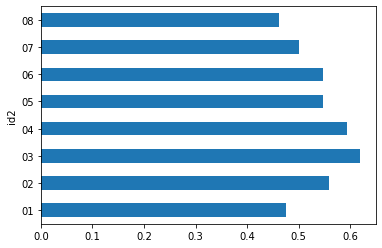

In [391]:
train.groupby('id2').mean()['Transported'].plot(kind='barh') # compare with the firts groupby after using the mode

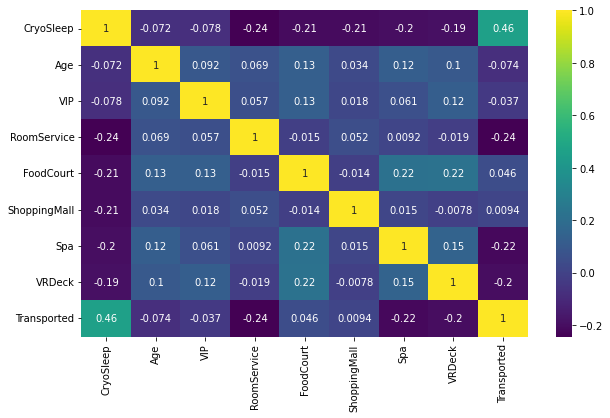

In [392]:
plt.subplots(figsize=(10,6)) # our heatmap not change a lot 
sns.heatmap(train.corr(),annot=True,cmap='viridis')

In [393]:
train.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,id2,cab1,cab3,id
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,01,B,P,0


In [394]:
df=pd.get_dummies(train,drop_first=True)

In [395]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,...,cab3_S,id_1,id_2,id_3,id_4,id_5,id_6,id_7,id_8,id_9
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,...,0,0,0,0,0,0,0,0,0,0
0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,...,1,0,0,0,0,0,0,0,0,0
0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,...,1,0,0,0,0,0,0,0,0,0
0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,...,1,0,0,0,0,0,0,0,0,0
0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,...,1,0,0,0,0,0,0,0,0,0


In [396]:
X=df.drop('Transported',axis=1) # Splitting the data
y=df.Transported

In [397]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score,confusion_matrix

In [398]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.25)

In [399]:
scaler=StandardScaler().fit(X_train)

In [400]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [401]:
RFC=RandomForestClassifier(random_state=42).fit(X_train,y_train)

In [402]:
RFC.score(X_test,y_test)

0.8077276908923643

In [403]:
params={'bootstrap': [True, False],
 'max_depth': [ 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,10,90]}

In [404]:
rf_grid=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_distributions=params,cv=5,verbose=3,scoring='accuracy')

In [405]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.798 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.775 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.759 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.785 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.773 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.803 total time=   0.1s
[CV 2/5] END boo

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 10, 90]},
                   scoring='accuracy', verbose=3)

In [406]:
rf_grid.score(X_test,y_test),rf_grid.score(X_train,y_train)

(0.8114075436982521, 0.905967172879276)

In [408]:
SVM=SVC(random_state=42).fit(X_train,y_train)

In [409]:
SVM.score(X_test,y_test),SVM.score(X_train,y_train)

(0.8081876724931003, 0.8318760546096027)

In [410]:
print(classification_report(y_test,SVM.predict(X_test)))

              precision    recall  f1-score   support

       False       0.81      0.81      0.81      1088
        True       0.81      0.81      0.81      1086

    accuracy                           0.81      2174
   macro avg       0.81      0.81      0.81      2174
weighted avg       0.81      0.81      0.81      2174



In [334]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [335]:
model=Sequential()

model.add(Dense(37,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(37,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(37,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [336]:
stop=EarlyStopping(patience=10,mode='min')

In [337]:
model.fit(X_train,y_train,epochs=250,validation_data=(X_test,y_test),callbacks=[stop])

Epoch 1/250
204/204 [==============================] - 1s 3ms/step - loss: 0.6256 - val_loss: 0.4896
Epoch 2/250
204/204 [==============================] - 1s 3ms/step - loss: 0.5007 - val_loss: 0.4363
Epoch 3/250
204/204 [==============================] - 1s 3ms/step - loss: 0.4644 - val_loss: 0.4206
Epoch 4/250
204/204 [==============================] - 1s 3ms/step - loss: 0.4423 - val_loss: 0.4132
Epoch 5/250
204/204 [==============================] - 1s 3ms/step - loss: 0.4349 - val_loss: 0.4074
Epoch 6/250
204/204 [==============================] - 1s 2ms/step - loss: 0.4265 - val_loss: 0.4043
Epoch 7/250
204/204 [==============================] - 1s 3ms/step - loss: 0.4257 - val_loss: 0.3975
Epoch 8/250
204/204 [==============================] - 1s 3ms/step - loss: 0.4158 - val_loss: 0.3931
Epoch 9/250
204/204 [==============================] - 1s 3ms/step - loss: 0.4134 - val_loss: 0.3915
Epoch 10/250
204/204 [==============================] - 1s 3ms/step - loss: 0.4087 - val_lo

In [338]:
loss=pd.DataFrame(model.history.history)

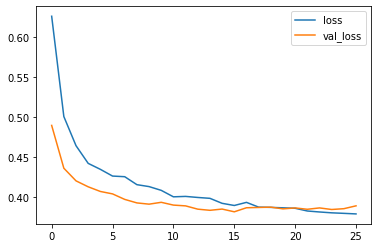

In [339]:
loss.plot()

In [340]:
print(classification_report(y_test,model.predict(X_test)>0.5))

              precision    recall  f1-score   support

       False       0.83      0.80      0.81      1088
        True       0.80      0.83      0.82      1086

    accuracy                           0.81      2174
   macro avg       0.81      0.81      0.81      2174
weighted avg       0.81      0.81      0.81      2174



In [ ]:
#the best model is the neural model

Preprocessing the test data

In [187]:
test=pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

In [188]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [189]:
id_test=test.PassengerId.str.split('_',expand=True) # split the colone id test
id_test.columns=['id1','id2']

In [190]:
test=test.join(id_test)

In [191]:
col_test=test.Cabin.str.split('/',expand=True)# split the cabin test
col_test.columns=['cab1','cab2','cab3']

In [192]:
test=test.join(col_test)

In [193]:
test.index=test.PassengerId
test.drop(['Name','Cabin','PassengerId','cab2'],axis=1,inplace=True)

In [194]:
id_cachetest=[]               #we replace id1 int the test
for i in range(0,len(test)):
  a=test.id1[i][:1]
  id_cachetest.append(a)

In [195]:
test['id']=id_cachetest
test.drop('id1',axis=1,inplace=True)

In [196]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,id2,cab1,cab3,id
PassengerId,,,,,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,01,G,S,0
0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,01,F,S,0
0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,01,C,S,0
0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,01,C,S,0
0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,01,F,S,0


In [198]:
test.isna().mean()*100

HomePlanet      2.034136
CryoSleep       2.174421
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
id2             0.000000
cab1            2.338087
cab3            2.338087
id              0.000000
dtype: float64

In [200]:
for i in test.columns:
  if test[i].isna().any():
    test[i]=test[i].fillna(test[i].mode()[0])

In [201]:
test.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
id2             0
cab1            0
cab3            0
id              0
dtype: int64

In [315]:
df_test=pd.get_dummies(test,drop_first=True)

In [316]:
df_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,...,cab3_S,id_1,id_2,id_3,id_4,id_5,id_6,id_7,id_8,id_9
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,True,27.0,False,0.0,0.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
0018_01,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
0019_01,True,31.0,False,0.0,0.0,0.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,0
0021_01,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,1,0,...,1,0,0,0,0,0,0,0,0,0
0023_01,False,20.0,False,10.0,0.0,635.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,True,34.0,False,0.0,0.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
9269_01,False,42.0,False,0.0,847.0,17.0,10.0,144.0,0,0,...,1,0,0,0,0,0,0,0,0,1
9271_01,True,18.0,False,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [204]:
df.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'id2_01',
       'id2_02', 'id2_03', 'id2_04', 'id2_05', 'id2_06', 'id2_07', 'id2_08',
       'cab1_A', 'cab1_B', 'cab1_C', 'cab1_D', 'cab1_E', 'cab1_F', 'cab1_G',
       'cab1_T', 'cab3_P', 'cab3_S', 'id_0', 'id_1', 'id_2', 'id_3', 'id_4',
       'id_5', 'id_6', 'id_7', 'id_8', 'id_9'],
      dtype='object')

In [205]:
df_test.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'id2_01',
       'id2_02', 'id2_03', 'id2_04', 'id2_05', 'id2_06', 'id2_07', 'id2_08',
       'cab1_A', 'cab1_B', 'cab1_C', 'cab1_D', 'cab1_E', 'cab1_F', 'cab1_G',
       'cab1_T', 'cab3_P', 'cab3_S', 'id_0', 'id_1', 'id_2', 'id_3', 'id_4',
       'id_5', 'id_6', 'id_7', 'id_8', 'id_9'],
      dtype='object')

In [318]:
df_test=scaler.transform(df_test)

In [341]:
prediction=model.predict(df_test)>0.5

In [342]:
pred=pd.DataFrame(prediction,columns=['Transported'],index=test.index)

In [343]:
pred.reset_index(inplace=True)

In [344]:
pred.to_csv('ma_sumission4.csv',index=False)

In [333]:
model.save('my_best_model.h5')

In [413]:
from keras.models import load_model

In [414]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')